 <font size="6">  Image preprocessing </font> 

---

In this notebook, we will demostrate preprocessing step, which is to remove undesired noise from the data. We visualize the results here and record the min and max for the parameters if the automatical calculated values that based on the distribution are not perfect.

## Load library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import warnings
import tifffile
warnings.filterwarnings("ignore")
import pandas as pd
from davinci.vectra_tool import *

## Preparation

### Load Image

In [2]:
tiff_images = sorted(glob.glob('../data/tif/*.tif')) 

### Collect sample ID

In [3]:
unique_sample_id = np.unique(np.array([x.split('/')[-1].split(' ')[0] for i,x in enumerate(tiff_images)]))
print('The unique sample ID in the data:',unique_sample_id)

The unique sample ID in the data: ['Sample1' 'Sample2']


### Create pre-processing parameter dataframe 

In [4]:
channel_list = ['channel1','channel2','channel3','channel4','channel5','channel6','channel7']
min_thold_initial_list = np.zeros((len(unique_sample_id),len(channel_list)))
min_thod_df = pd.DataFrame(min_thold_initial_list)
min_thod_df.columns = channel_list
min_thod_df.index = unique_sample_id
min_thod_df.head()

channel1  channel2  channel3  channel4  channel5  channel6  channel7
Sample1       0.0       0.0       0.0       0.0       0.0       0.0       0.0
Sample2       0.0       0.0       0.0       0.0       0.0       0.0       0.0

#### Save it to local

In [5]:
min_thod_df.to_csv('../parameter/min_thod.csv')
min_thod_df.to_csv('../parameter/max_thod.csv')

## Collect max intensity 

In [6]:
%%time
max_array = np.array([np.max(ndimage.gaussian_filter(tifffile.imread(x),sigma=3),axis=(1,2)) for i,x in enumerate(tiff_images)  ])

CPU times: user 704 ms, sys: 34 ms, total: 738 ms
Wall time: 737 ms


## Preprocessing Tuning and Validation

In this section, the user should open the '../parameter/min_thod.csv' and  '../parameter/max_thod.csv' in a text editor. Then manully modify the min and max value in each sample each channel based on the visualization.

The threshold function will automatically come with a threshold for each channel and each image. however, sometimes the value is off. If you feel the threshold is too high or too low, you can adjust the min_thold and max_thold in the function until you think they provide good cleaning. Record the min_thold and max_thold in your csv file. Each sample only has one min_thold and one max_thold. We remove the signal below the threshold.

The first col of the plot shows the distribution of the signal and the threshold. The second col shows the raw image and the last one shows the image after preprocessing. We order the image based on the max intensity and visualize the top and buttom ones.

The DAPI channel is usually clean and we have speacial parameter for it. Add dapi=True in the function if it is the dapi channel. The default is false.

### Channel 1

In [7]:
cn1_index=0

Modify the sample_index below to display images from different samples. The min_thold and max_thold are designed for per sample.

1.2579192876815797
Threshold is:  2.685084


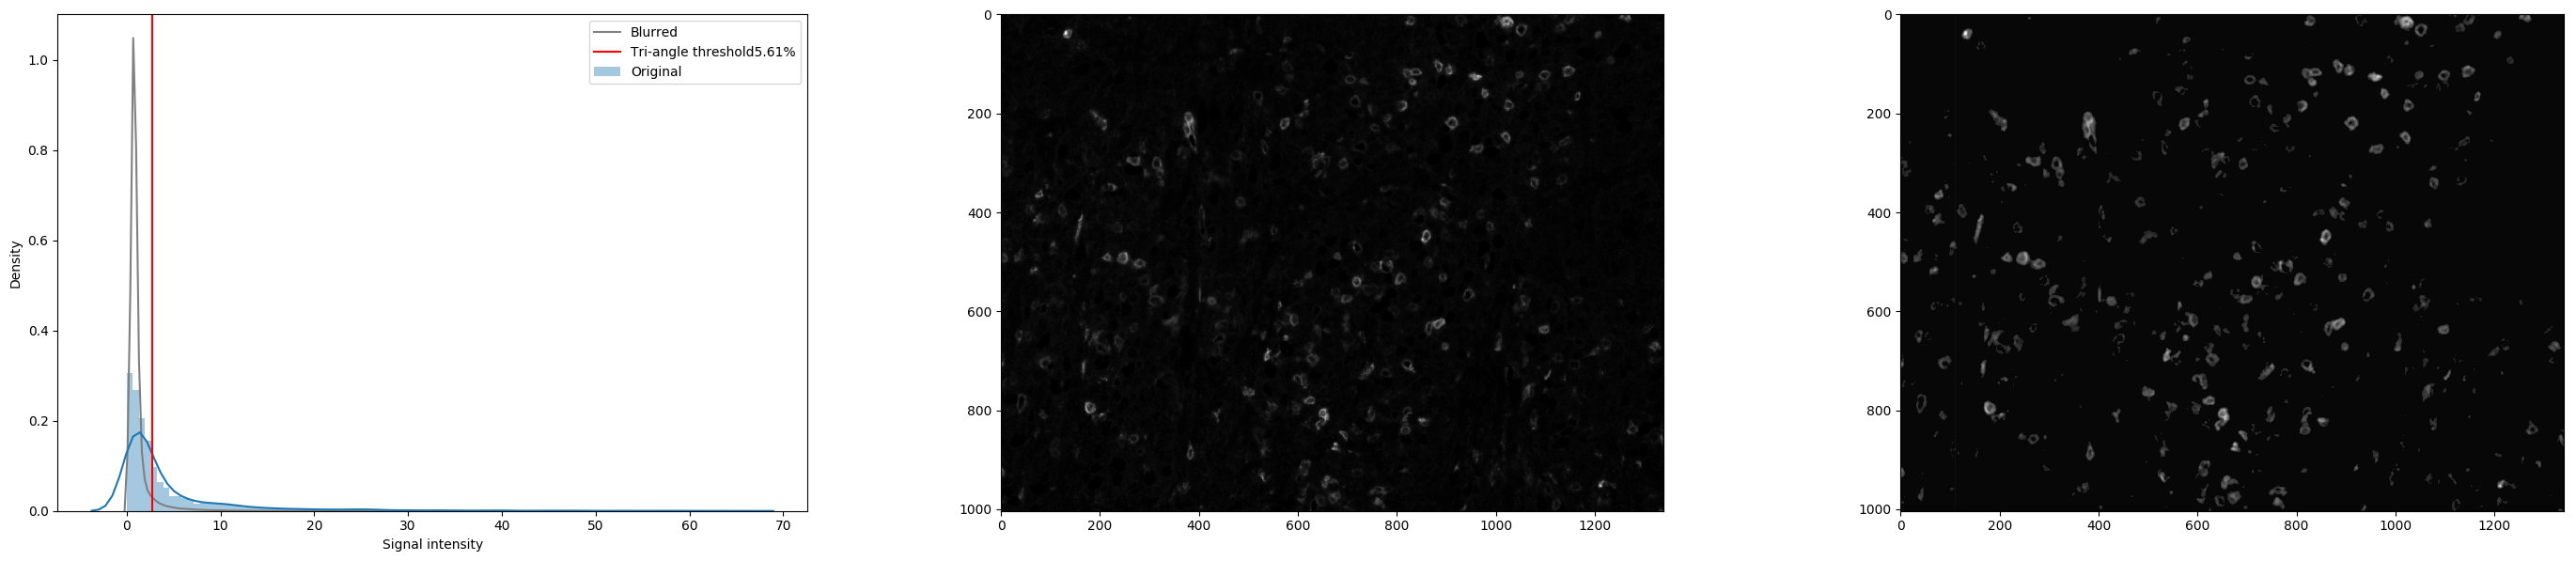

In [8]:
sample_index=1
sample_id= [x for x in tiff_images if (unique_sample_id[sample_index] in x) ]
for i in range (min(10,len(sample_id))):
    threshold_one_plot(tifffile.imread(sample_id[i]),cn1_index,scale='adap',min_thold=2,max_thold=4)
    

### Channel 2

In [9]:
cn2_index=1

0.5243309259414672
Threshold is:  2.49099


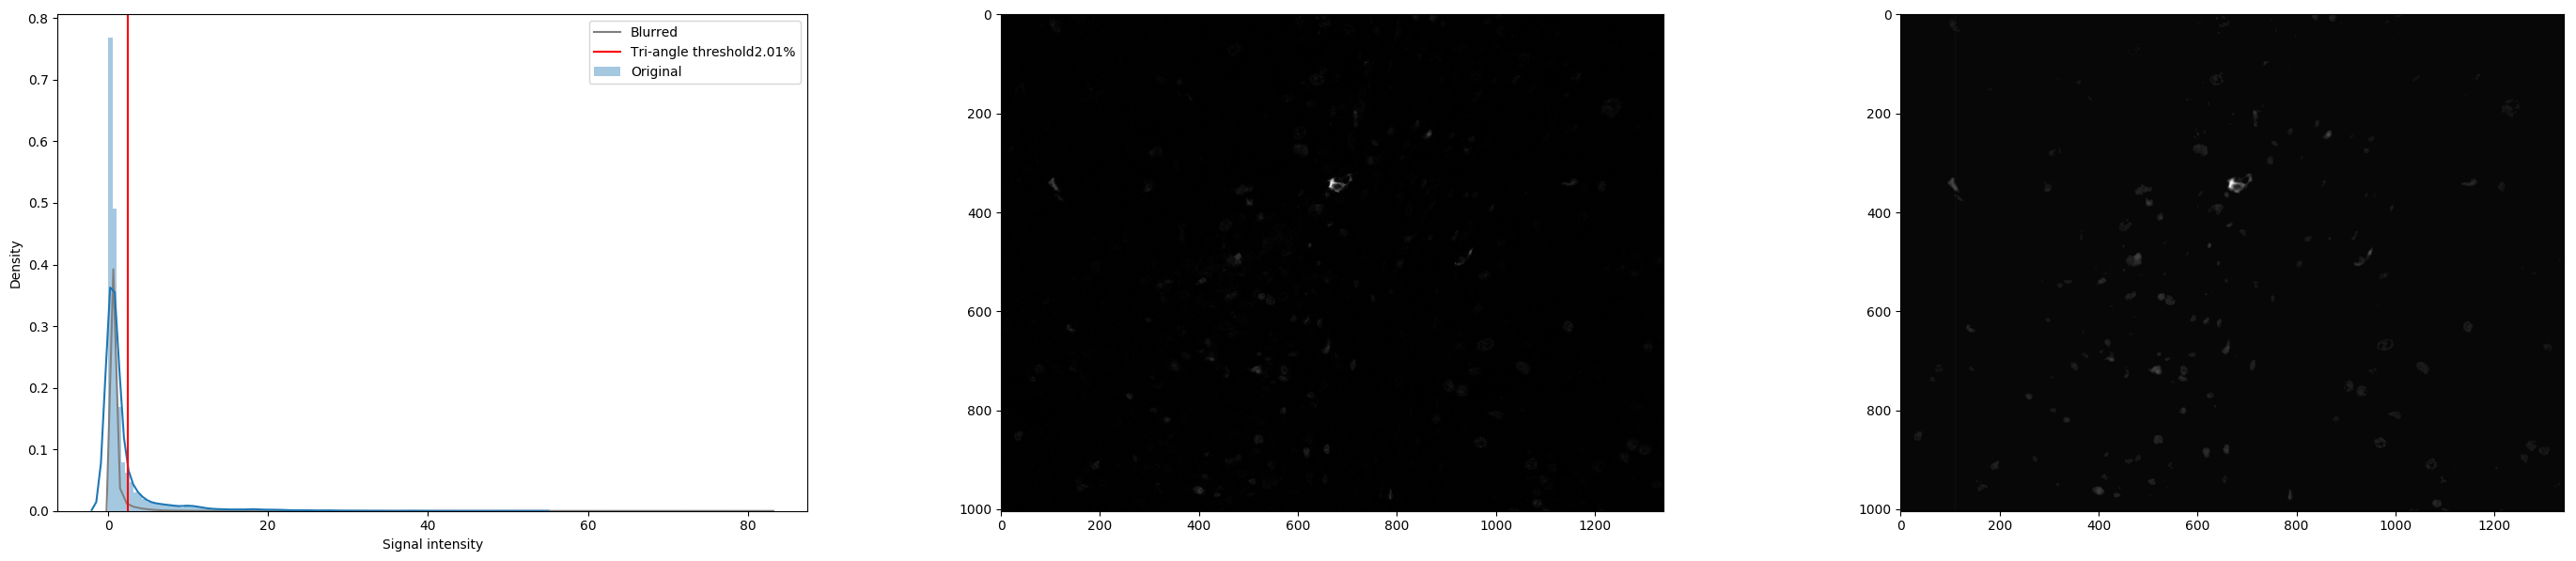

In [10]:
sample_index=0
sample_id= [x for x in tiff_images if (unique_sample_id[sample_index] in x) ]
for i in range (min(10,len(sample_id))):
    threshold_one_plot(tifffile.imread(sample_id[i]),cn2_index,scale='adap',min_thold=2,max_thold=4)

### Channel 3

In [11]:
cn3_index=2

0.7988053679466247
Threshold is:  2.0480657


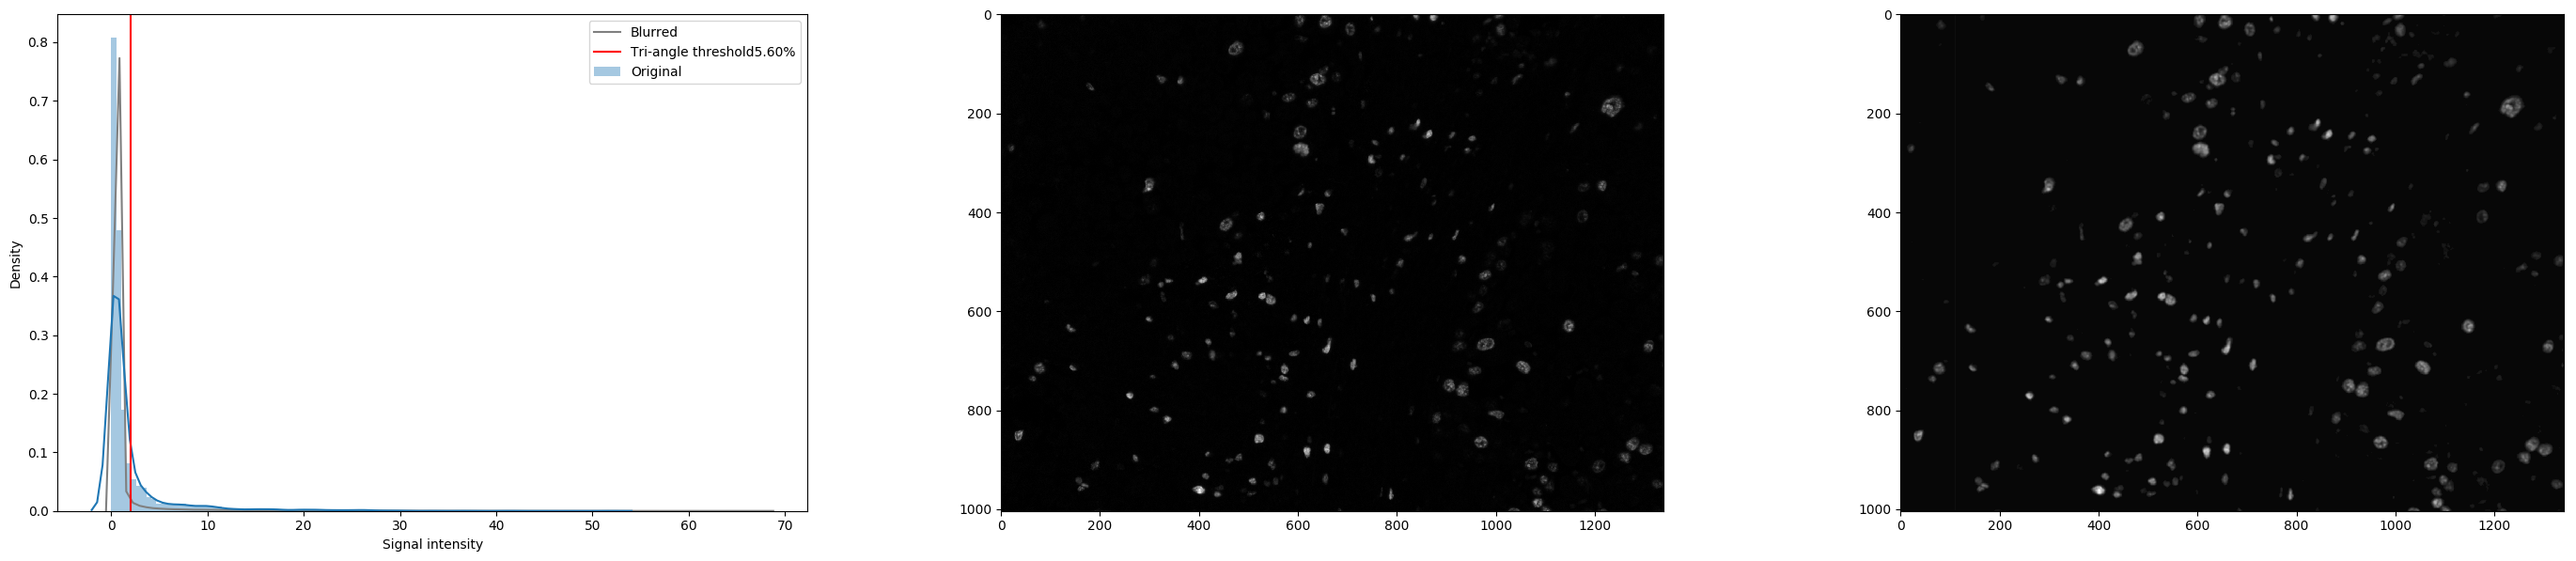

In [12]:
sample_index=0
sample_id= [x for x in tiff_images if (unique_sample_id[sample_index] in x) ]
for i in range (min(10,len(sample_id))):
    threshold_one_plot(tifffile.imread(sample_id[i]),cn3_index,scale='adap',min_thold=2,max_thold=4)

### Channel 4

In [13]:
cn4_index=3

0.44984022378921507
Threshold is:  2.3487716


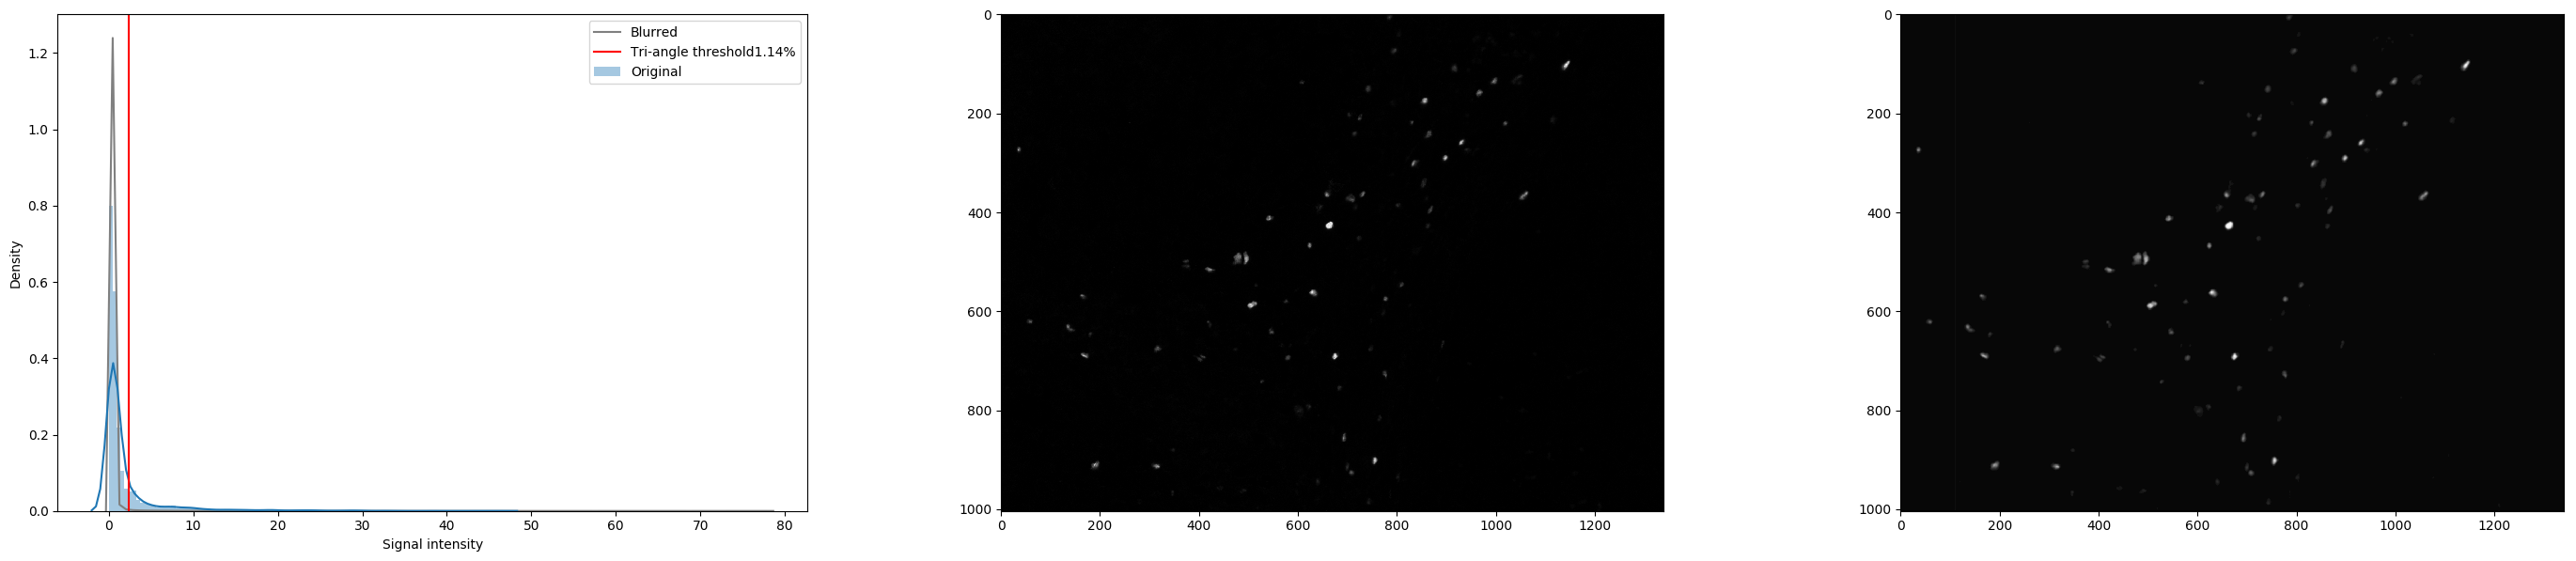

In [14]:
sample_index=0
sample_id= [x for x in tiff_images if (unique_sample_id[sample_index] in x) ]
for i in range (min(10,len(sample_id))):
    threshold_one_plot(tifffile.imread(sample_id[i]),cn4_index,scale='adap',min_thold=2,max_thold=4)

### Channel 5

In [15]:
cn5_index=4

0.9524221897125245
Threshold is:  3.469987


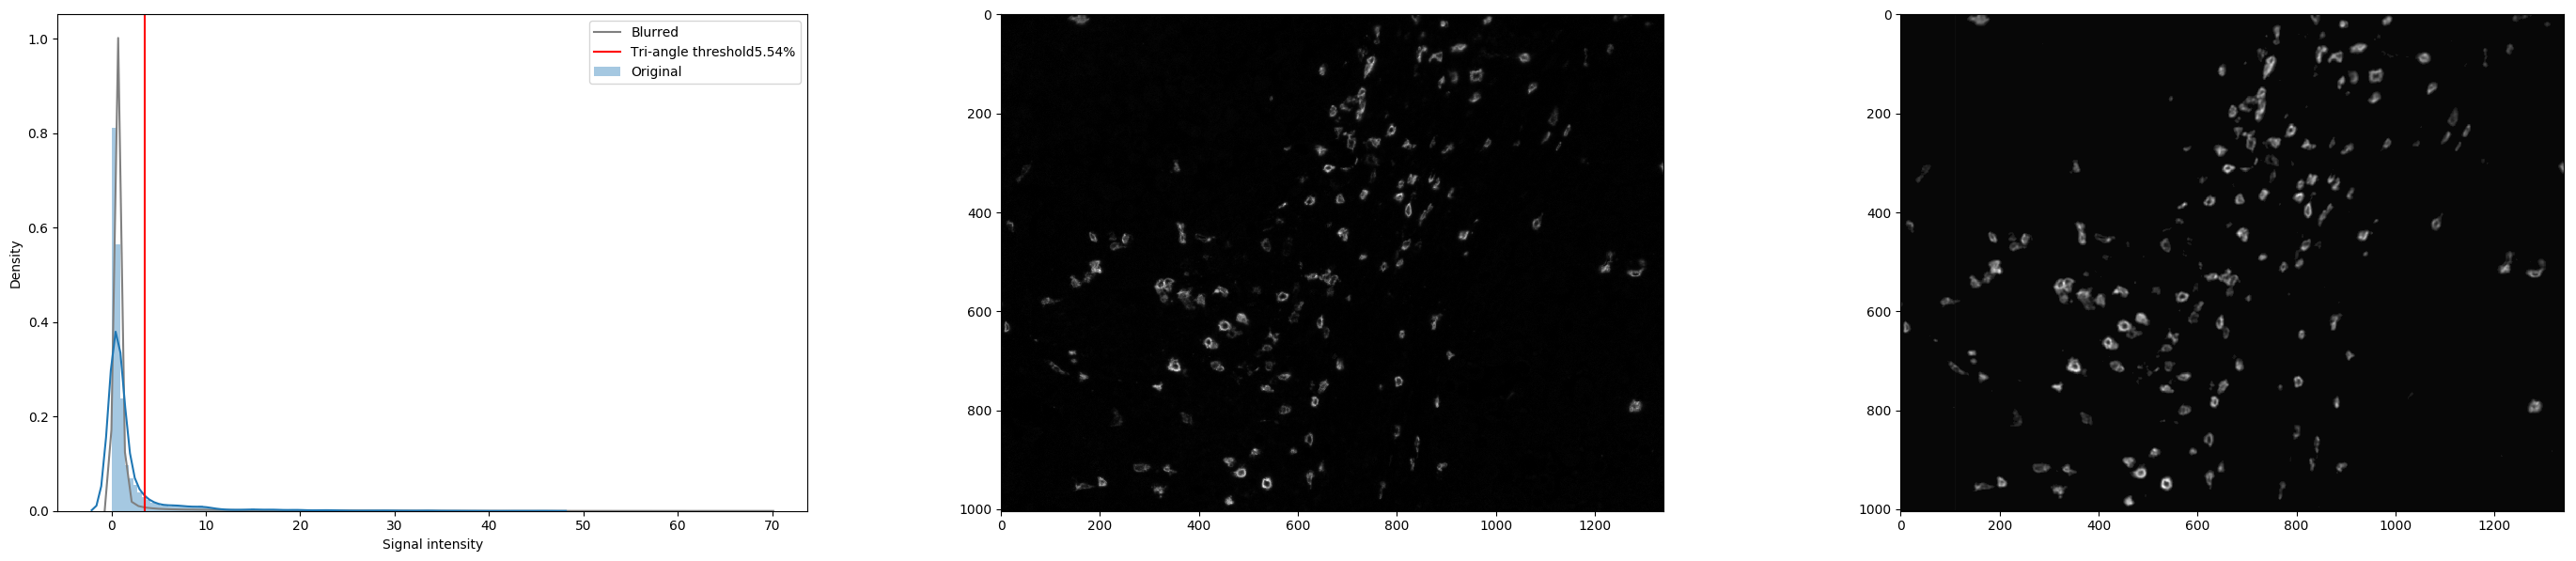

In [16]:
sample_index=0
sample_id= [x for x in tiff_images if (unique_sample_id[sample_index] in x) ]
for i in range (min(10,len(sample_id))):
    threshold_one_plot(tifffile.imread(sample_id[i]),cn5_index,scale='adap',min_thold=2,max_thold=4)

### Channel 6

In [17]:
cn6_index=5

12.978950500488281
Threshold is:  3.959075927734375


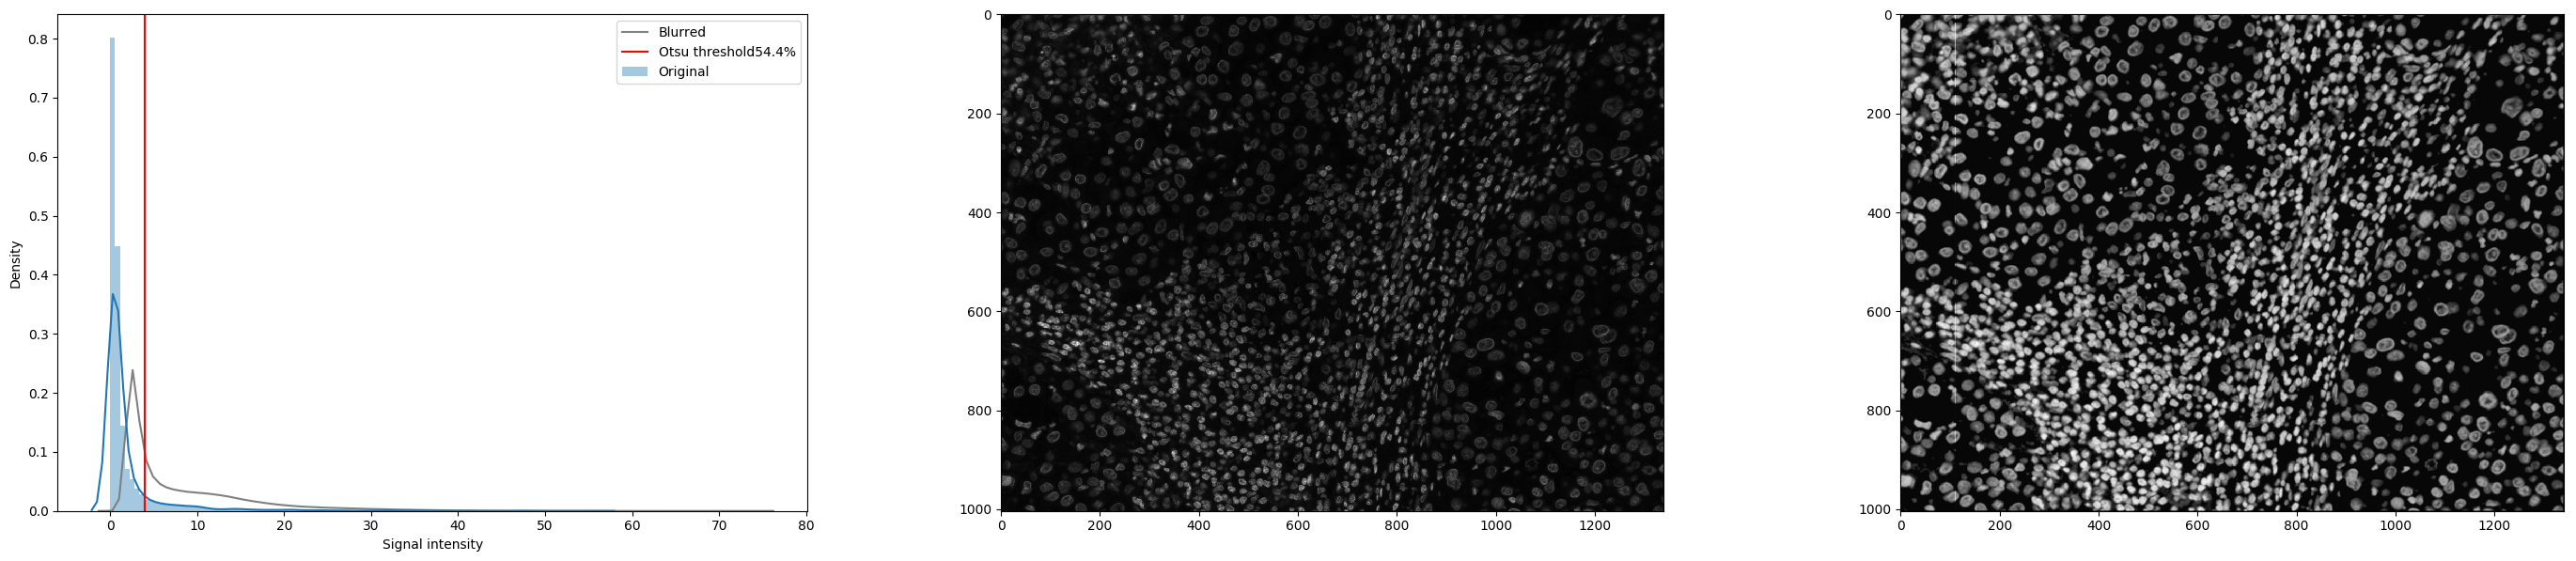

In [18]:
sample_index=0
sample_id= [x for x in tiff_images if (unique_sample_id[sample_index] in x) ]
for i in range (min(10,len(sample_id))):
    threshold_one_plot(tifffile.imread(sample_id[i]),cn6_index,scale='adap',min_thold=2,max_thold=4,dapi=True)

### Channel 7

In [19]:
cn7_index = 6

6.647069263458253
Threshold is:  3


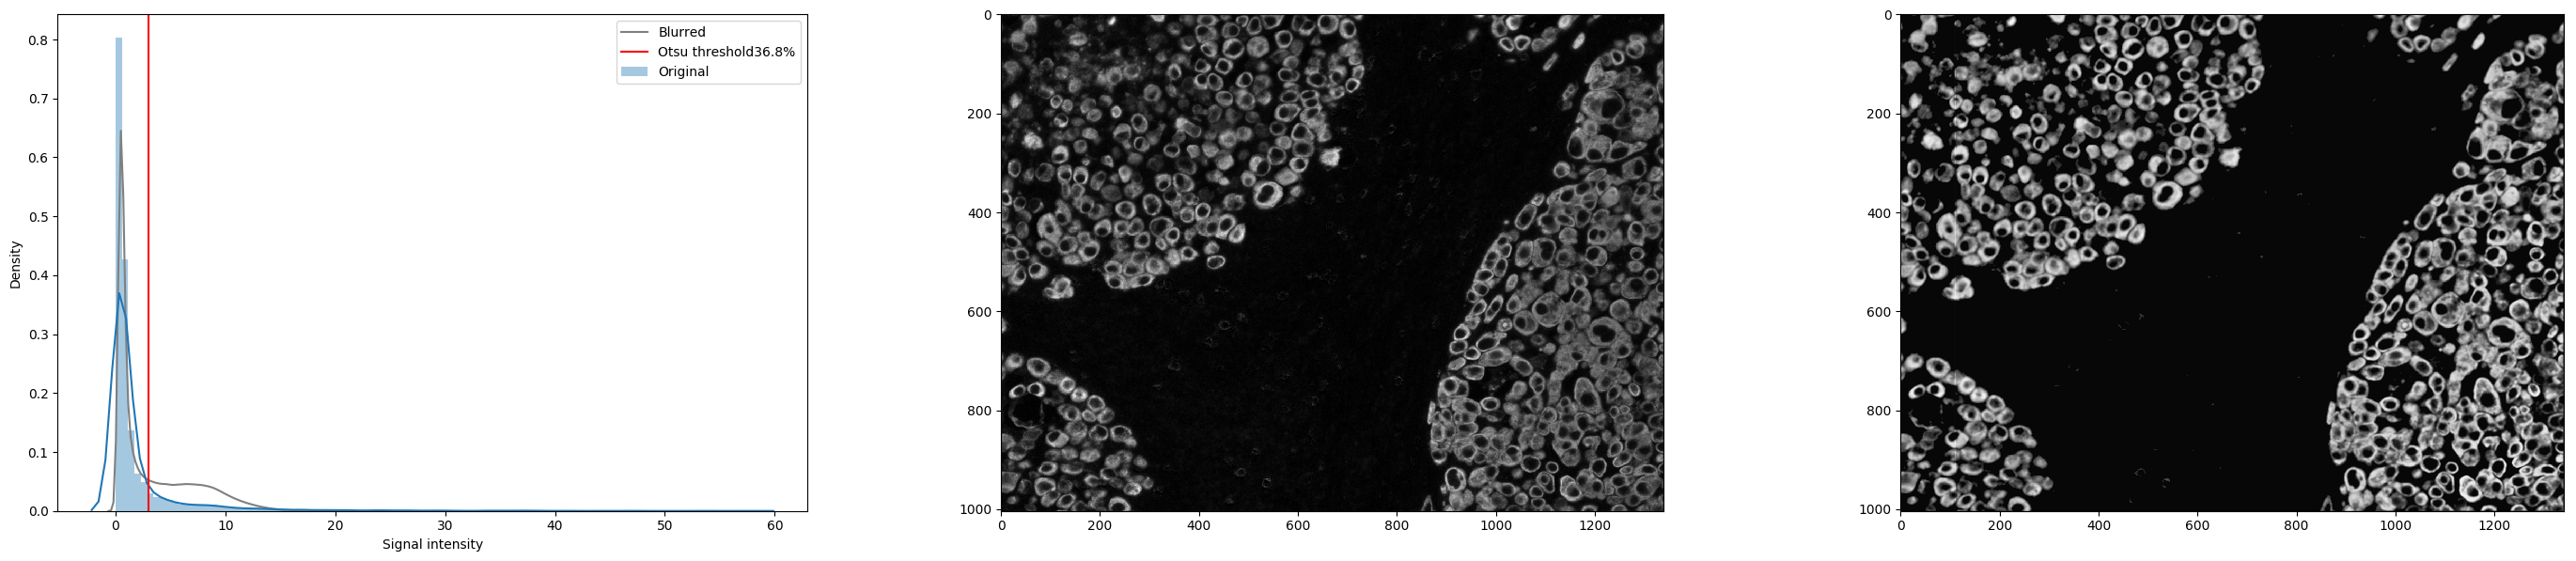

In [20]:
sample_index=0
sample_id= [x for x in tiff_images if (unique_sample_id[sample_index] in x) ]
for i in range (min(10,len(sample_id))):
    threshold_one_plot(tifffile.imread(sample_id[i]),cn7_index,scale='adap',min_thold=2,max_thold=3)

## Output preprocessing parameters

Save your csv file and we will read the updated version here.

In [21]:
min_thod_df = pd.read_csv('../parameter/min_thod_update.csv',index_col=0)
max_thod_df = pd.read_csv('../parameter/max_thod_update.csv',index_col=0)
sample_id_list =(np.array([x.split('/')[-1].split(' ')[0] for i,x in enumerate(tiff_images)]))

Get the threshold for each image each channel with the automatical methods and the manully tuned parameters

In [22]:
thold_arr = np.zeros((len(tiff_images),len(channel_list)))
dapi_chanel_index=5
for i,x in enumerate(tiff_images):
    sample_id = sample_id_list[i]
    img_arr = tifffile.imread(x)
    for chan in range(len(channel_list)):
        thold_arr[i,chan] = threshold_one(img_arr,index=chan,min_thold=min_thod_df.loc[sample_id,channel_list[chan]],max_thold=max_thod_df.loc[sample_id,channel_list[chan]],dapi=(chan==dapi_chanel_index))

In [23]:
np.savetxt("../parameter/threshold.csv", thold_arr, delimiter=",")